In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

In [2]:
train = pd.read_csv('Data/train_data.csv', usecols=['Time (s)','ENC_X(um)', 'dENC_X(um)', 'ddENC_X(um)', 'EndPoint_X(um)']).dropna()
test = pd.read_csv('Data/test_data.csv', usecols=['Time (s)', 'ENC_X(um)', 'dENC_X(um)', 'ddENC_X(um)', 'EndPoint_X(um)']).dropna()
train, test


(     Time (s)  EndPoint_X(um)  ENC_X(um)  dENC_X(um)  ddENC_X(um)
 2    0.116375        6.094759      8.675      -0.485        0.040
 3    0.116500        6.094759      8.155      -0.520       -0.035
 4    0.116625        6.094759      7.650      -0.505        0.015
 5    0.116750        6.094759      7.105      -0.545       -0.040
 6    0.116875        6.094759      6.575      -0.530        0.015
 ..        ...             ...        ...         ...          ...
 629  0.194750        1.329061      0.025       0.000       -0.025
 630  0.194875        2.071260      0.025       0.000        0.000
 631  0.195000        2.071260      0.025       0.000        0.000
 632  0.195125        2.735332      0.040       0.015        0.015
 633  0.195250        2.735332      0.060       0.020        0.005
 
 [632 rows x 5 columns],
      Time (s)  EndPoint_X(um)  ENC_X(um)  dENC_X(um)  ddENC_X(um)
 0    0.195375        2.735332      0.055      -0.005       -0.025
 1    0.195500        3.008774     

In [3]:
x_train = train[['ENC_X(um)', 'dENC_X(um)', 'ddENC_X(um)']]
y_train = train['EndPoint_X(um)']

x_test = test[['ENC_X(um)', 'dENC_X(um)', 'ddENC_X(um)']]
y_test = test['EndPoint_X(um)']



c:\Users\Chirag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


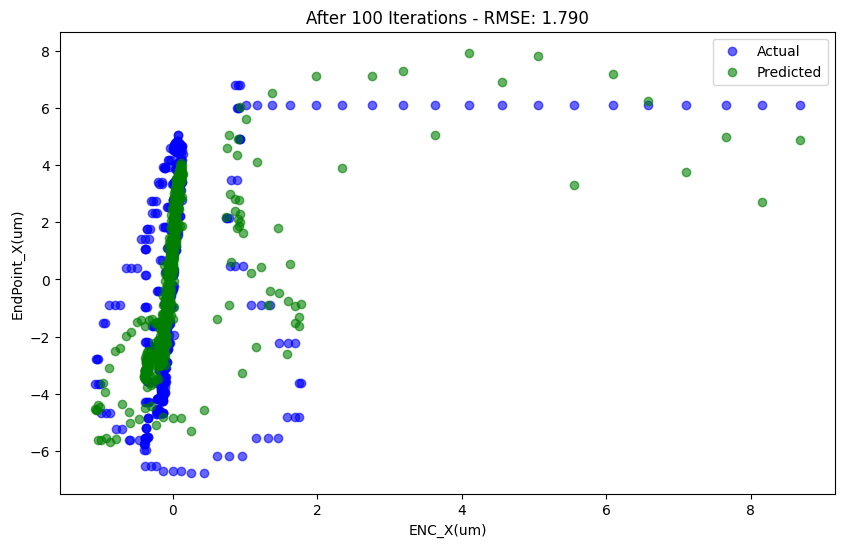

c:\Users\Chirag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


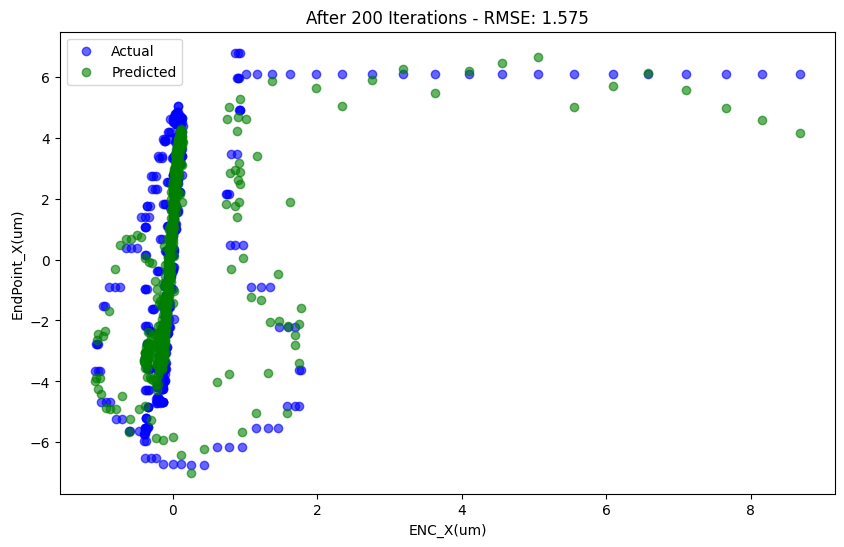

c:\Users\Chirag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


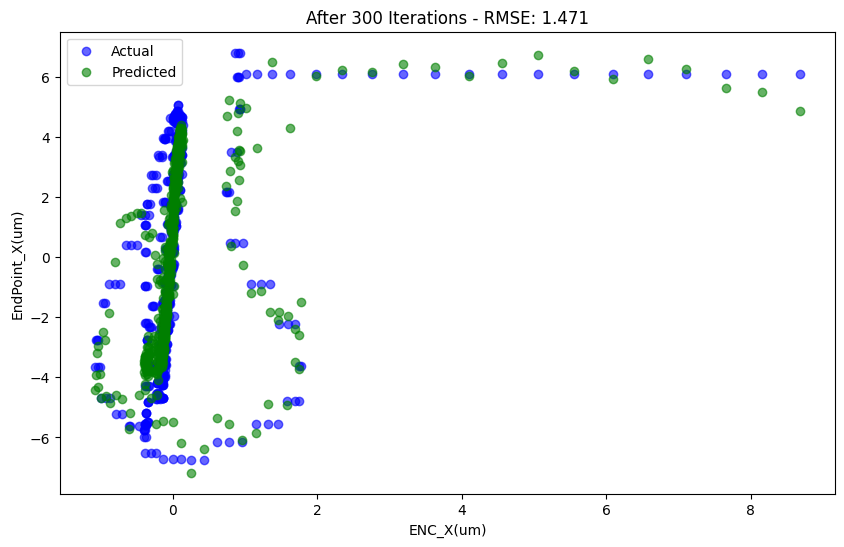

c:\Users\Chirag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


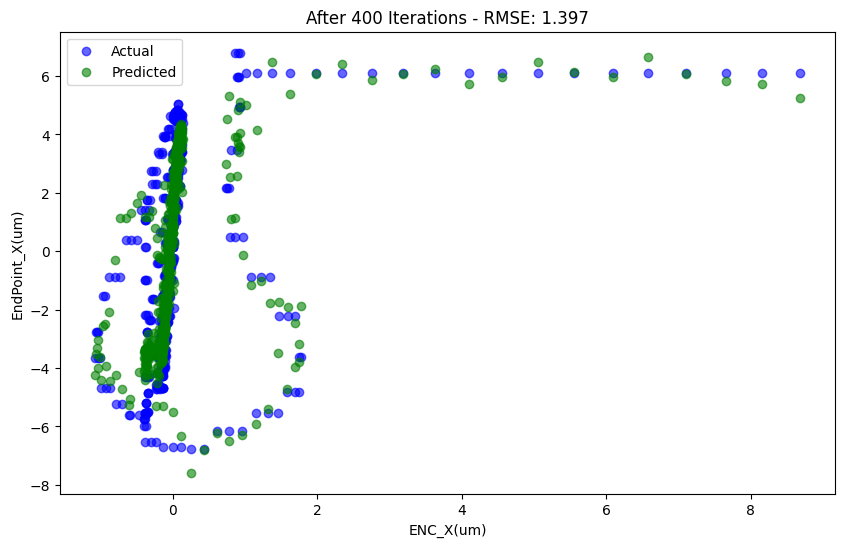

c:\Users\Chirag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


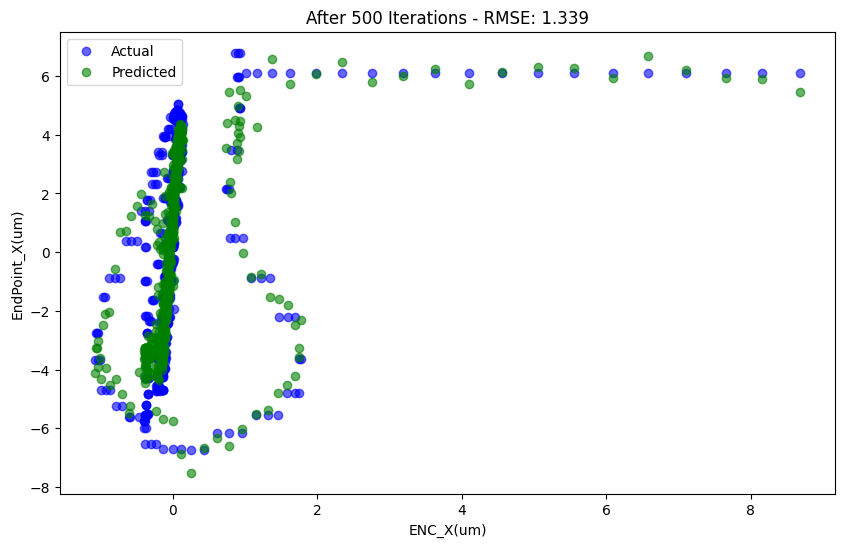

c:\Users\Chirag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


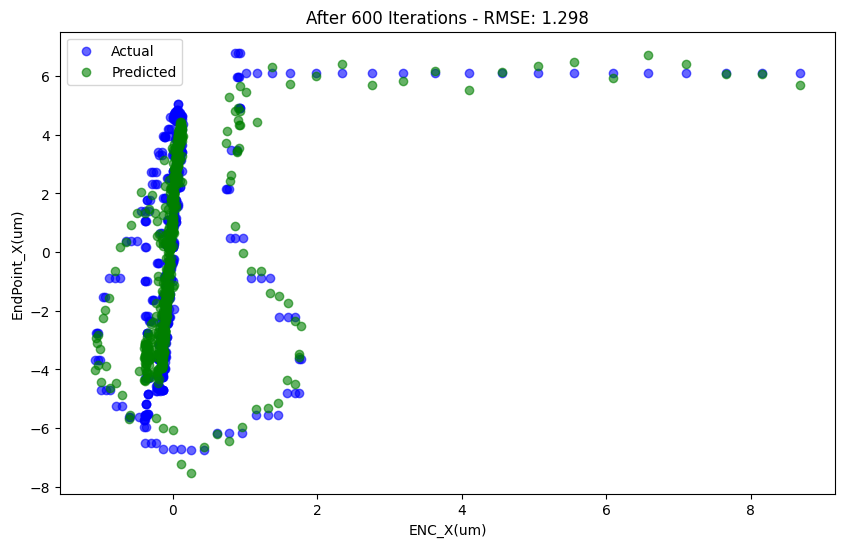

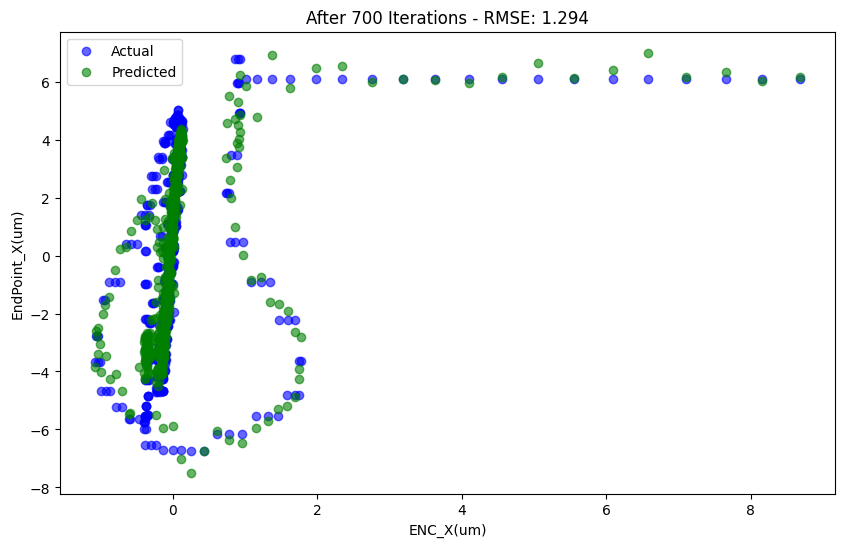

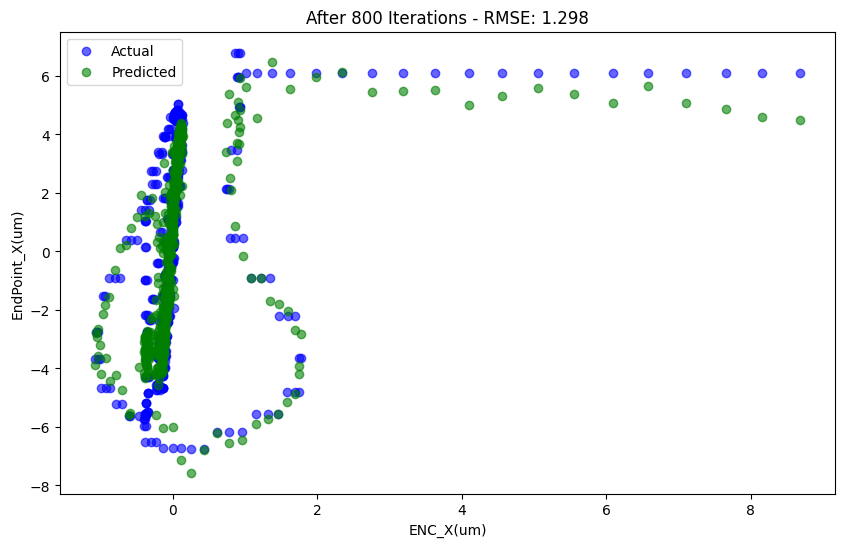

In [16]:
# Initialize the model and the pipeline with warm_start=True
model = MLPRegressor(hidden_layer_sizes=(20, 50, 20), max_iter=100, activation='relu', warm_start=True, random_state=42)
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', model)
])

# Number of loops
loops = 8

# Placeholder for RMSE values
rmse_values = []

for i in range(loops):
    # Fit the model for 100 iterations
    pipeline.fit(x_train, y_train)
    
    # Predict and calculate RMSE
    predictions = pipeline.predict(x_train)
    rmse = mean_squared_error(y_train, predictions, squared=False)
    rmse_values.append(rmse)
    
    # Visualize predictions vs actual values
    plt.figure(figsize=(10, 6))
    plt.scatter(x_train['ENC_X(um)'], y_train, color='blue', alpha=0.6, label='Actual')
    plt.scatter(x_train['ENC_X(um)'], predictions, color='green', alpha=0.6, label='Predicted')
    plt.title(f'After {100 * (i + 1)} Iterations - RMSE: {rmse:.3f}')
    plt.xlabel('ENC_X(um)')
    plt.ylabel('EndPoint_X(um)')
    plt.legend()
    plt.show()
    


Text(0.5, 1.0, 'RMSE Values')

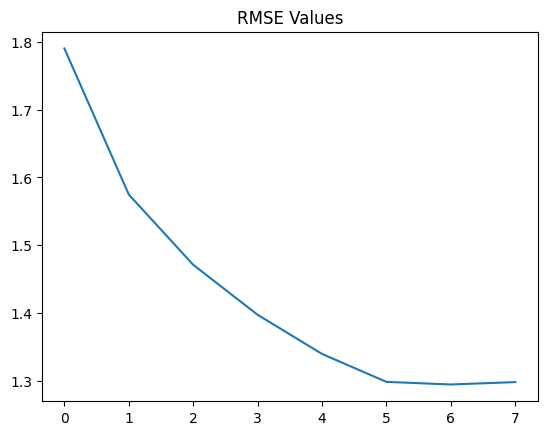

In [17]:

# Display RMSE values
plt.plot(rmse_values)
plt.title('RMSE Values')


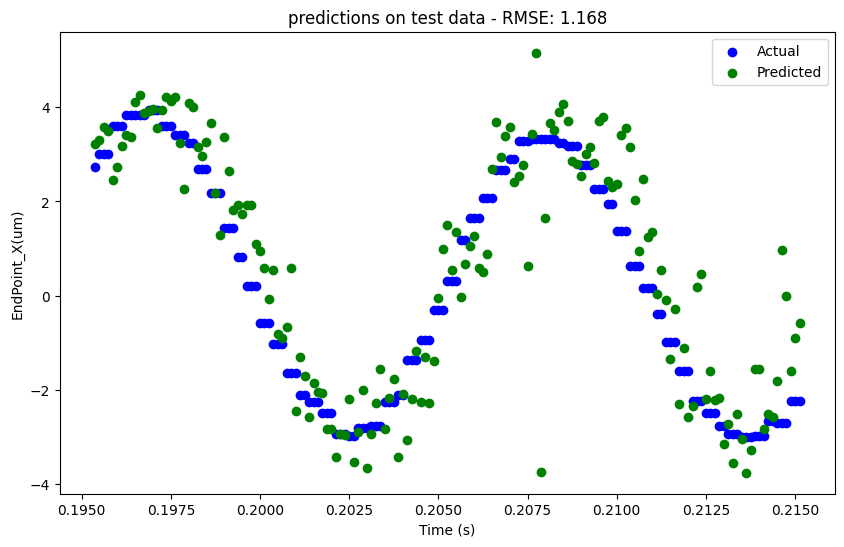

In [18]:
predictions_test = pipeline.predict(x_test)
rmse_test = mean_squared_error(y_test, predictions_test, squared=False)

# Visualize predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(test["Time (s)"], y_test, color='blue', label='Actual')
plt.scatter(test["Time (s)"], predictions_test, color='green', label='Predicted')


plt.title(f'predictions on test data - RMSE: {rmse_test:.3f}')
plt.xlabel('Time (s)')
plt.ylabel('EndPoint_X(um)')
plt.legend()
plt.show()

